In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
df = pd.read_csv('/content/insurance.csv')
df.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      986 non-null    int64
 1   Diabetes                 986 non-null    int64
 2   BloodPressureProblems    986 non-null    int64
 3   AnyTransplants           986 non-null    int64
 4   AnyChronicDiseases       986 non-null    int64
 5   Height                   986 non-null    int64
 6   Weight                   986 non-null    int64
 7   KnownAllergies           986 non-null    int64
 8   HistoryOfCancerInFamily  986 non-null    int64
 9   NumberOfMajorSurgeries   986 non-null    int64
 10  PremiumPrice             986 non-null    int64
dtypes: int64(11)
memory usage: 84.9 KB


In [26]:
df.describe()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
count,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000
mean,41.745436,0.419878,0.468560,0.055781,0.180527,168.182556,76.950304,0.215010,0.117647,0.667343,24336.713996
std,13.963371,0.493789,0.499264,0.229615,0.384821,10.098155,14.265096,0.411038,0.322353,0.749205,6248.184382
min,18.000000,0.000000,0.000000,0.000000,0.000000,145.000000,51.000000,0.000000,0.000000,0.000000,15000.000000
25%,30.000000,0.000000,0.000000,0.000000,0.000000,161.000000,67.000000,0.000000,0.000000,0.000000,21000.000000
50%,42.000000,0.000000,0.000000,0.000000,0.000000,168.000000,75.000000,0.000000,0.000000,1.000000,23000.000000
75%,53.000000,1.000000,1.000000,0.000000,0.000000,176.000000,87.000000,0.000000,0.000000,1.000000,28000.000000
max,66.000000,1.000000,1.000000,1.000000,1.000000,188.000000,132.000000,1.000000,1.000000,3.000000,40000.000000


In [27]:
df.isnull().sum()

,0
Age,0
Diabetes,0
BloodPressureProblems,0
AnyTransplants,0
AnyChronicDiseases,0
Height,0
Weight,0
KnownAllergies,0
HistoryOfCancerInFamily,0
NumberOfMajorSurgeries,0


In [28]:
print("Number of unique values in each column\n")

for col in df.columns:
  print(f"'{col}': {df[col].nunique()} ")

Number of unique values in each column

'Age': 49 
'Diabetes': 2 
'BloodPressureProblems': 2 
'AnyTransplants': 2 
'AnyChronicDiseases': 2 
'Height': 44 
'Weight': 74 
'KnownAllergies': 2 
'HistoryOfCancerInFamily': 2 
'NumberOfMajorSurgeries': 4 
'PremiumPrice': 24 


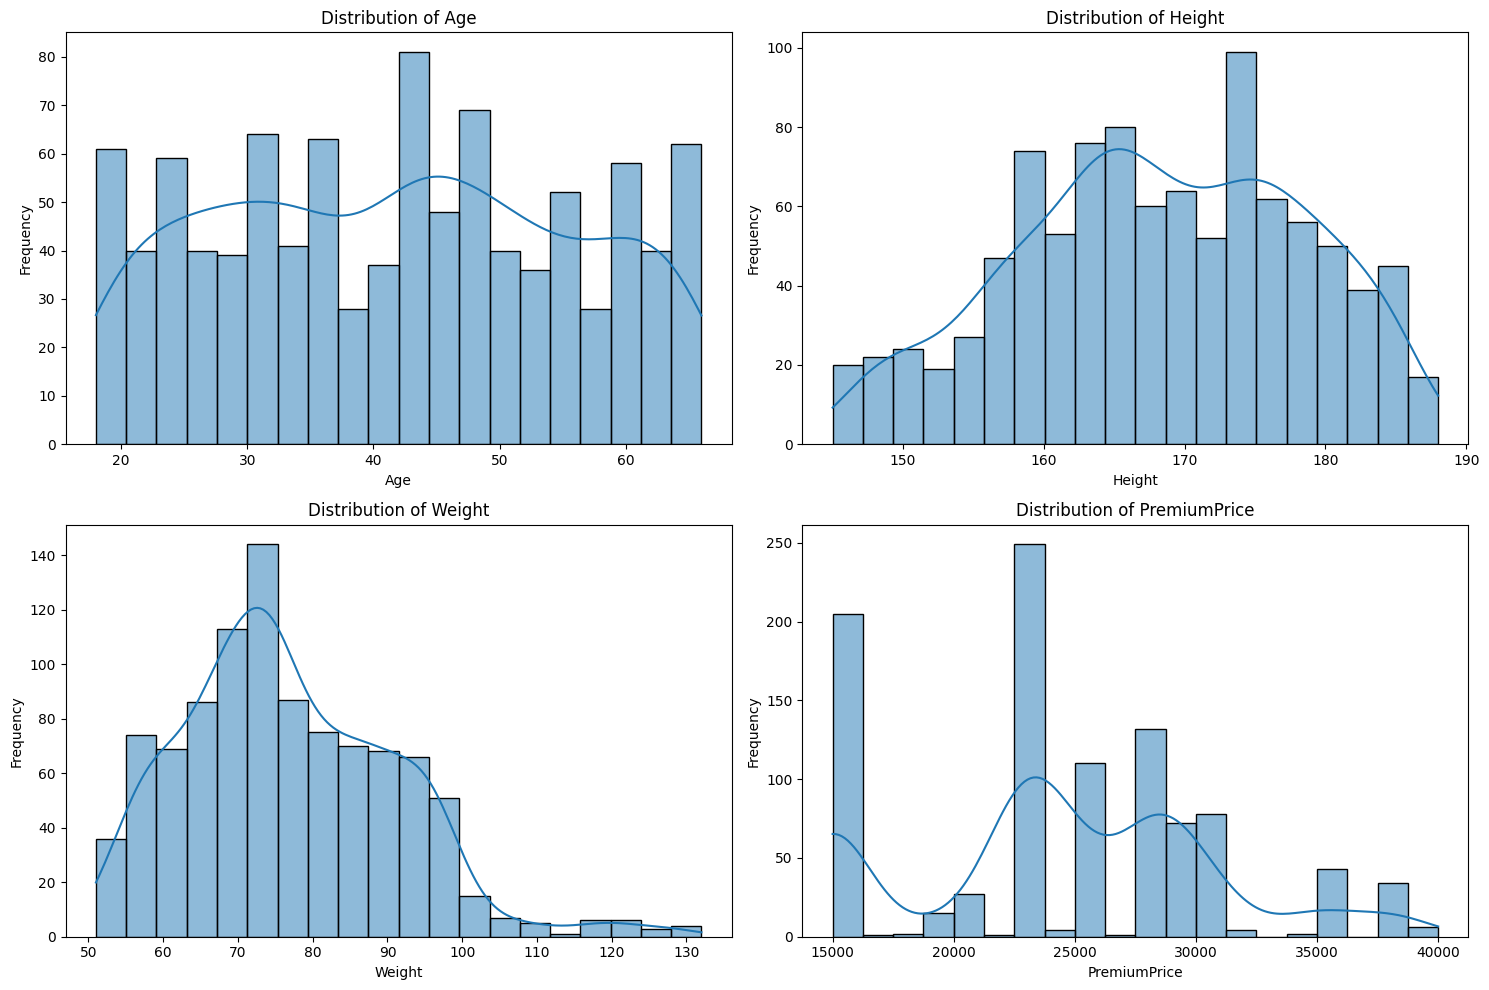

In [29]:
numerical_cols = ['Age', 'Height', 'Weight', 'PremiumPrice']
categorical_cols = ['Diabetes', 'BloodPressureProblems', 'AnyTransplants', 'AnyChronicDiseases', 'KnownAllergies', 'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 2, i + 1)
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

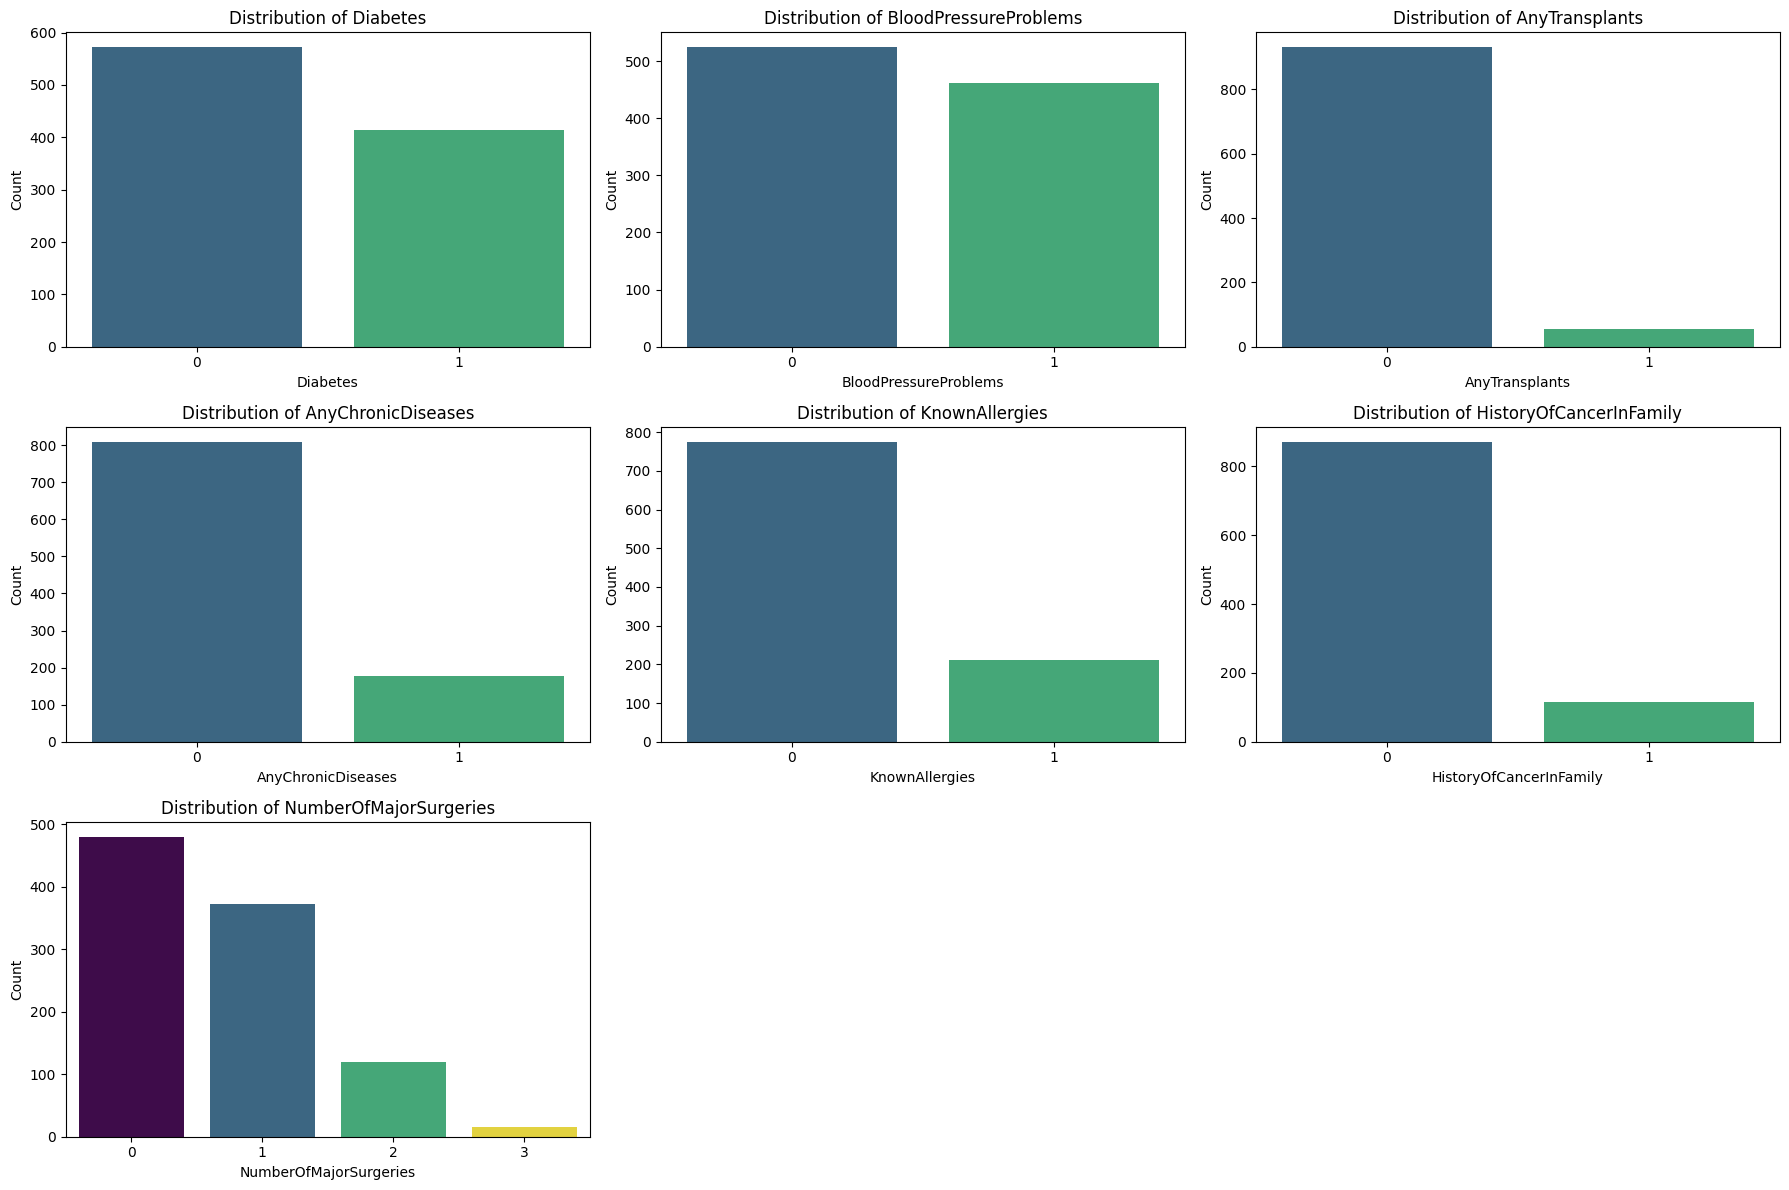

In [30]:
plt.figure(figsize=(18, 12))
for i, col in enumerate(categorical_cols):
    plt.subplot(3, 3, i + 1) # Adjust grid size as needed
    sns.countplot(x=df[col], hue=df[col], palette='viridis', legend=False)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

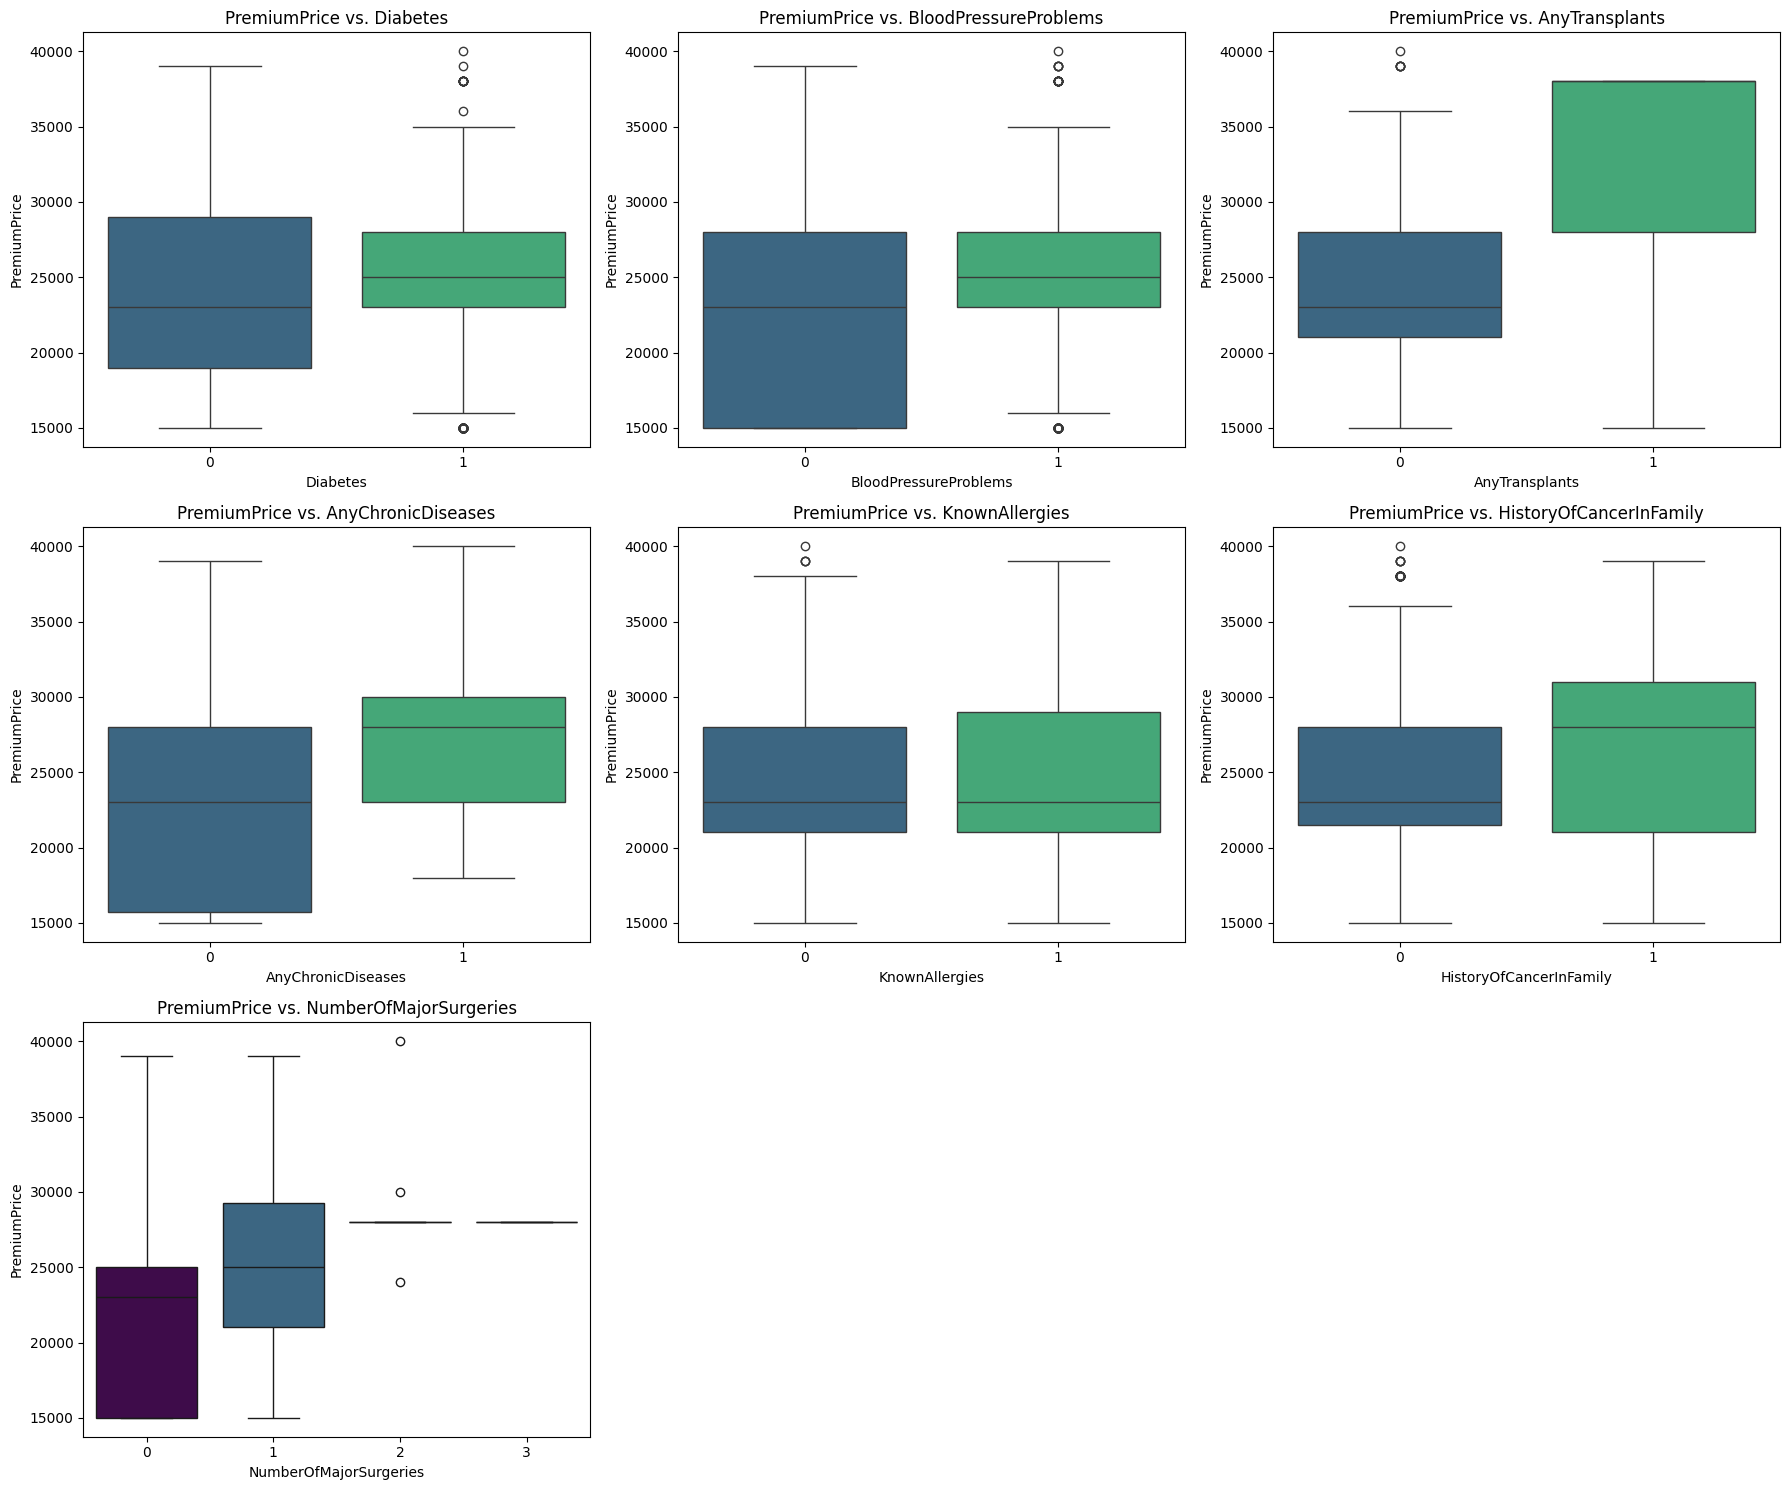

In [31]:
plt.figure(figsize=(18, 15))
for i, col in enumerate(categorical_cols):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x=col, y='PremiumPrice', data=df, hue=col, palette='viridis', legend=False)
    plt.title(f'PremiumPrice vs. {col}')
    plt.xlabel(col)
    plt.ylabel('PremiumPrice')
plt.tight_layout()
plt.show()



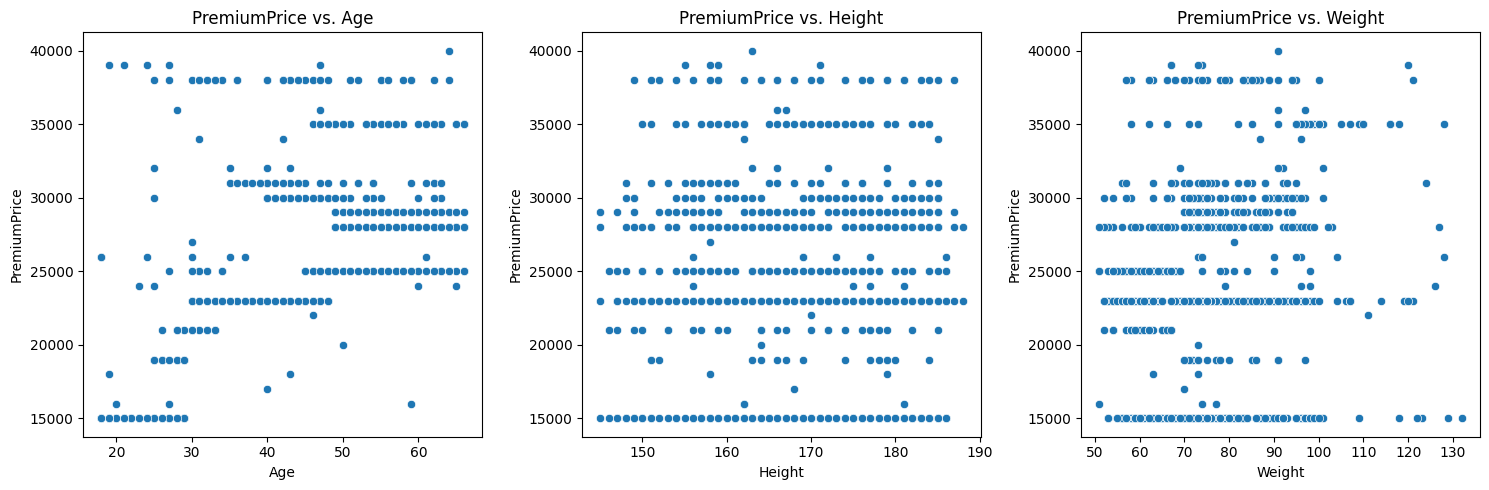

In [32]:
plt.figure(figsize=(15, 5))
scatterplot_cols = ['Age', 'Height', 'Weight']
for i, col in enumerate(scatterplot_cols):
    plt.subplot(1, 3, i + 1)
    sns.scatterplot(x=col, y='PremiumPrice', data=df)
    plt.title(f'PremiumPrice vs. {col}')
    plt.xlabel(col)
    plt.ylabel('PremiumPrice')
plt.tight_layout()
plt.show()

## **EDA**

### Structure of the data:
- The dataset contains **986 rows** and **11 columns**. All columns are of `int64` datatype.
- There are **no missing values** in any of the columns hence missing value treatment is not required.
- Age, Height, Weight and PremiumPrice are continuous variables whereas all the remaining columns are binary variables except NumberOfMajorSurgeries which has 4 unique values.



#### Categorical Features:
- **Diabetes**: Approximately 42% of individuals have diabetes (value 1), while 58% do not (value 0).
- **BloodPressureProblems**: Around 47% of individuals have blood pressure problems.
- **AnyTransplants**: A small percentage (about 5.5%) of individuals have had any transplants, indicating a class imbalance.
- **AnyChronicDiseases**: Approximately 18% of individuals have chronic diseases.
- **KnownAllergies**: Around 21.5% of individuals have known allergies.
- **HistoryOfCancerInFamily**: About 11.8% of individuals have a family history of cancer.
- **NumberOfMajorSurgeries**: The majority of individuals (around 48%) have had 0 major surgeries, followed by 1 surgery (37%). A smaller proportion had 2 or 3 major surgeries, indicating a skewed distribution.

#### Numerical Features:
- **Age**: The age distribution is relatively uniform, ranging from 18 to 66 years, with a mean of approximately 41.7 years.
- **Height**: Height is normally distributed, ranging from 145 cm to 188 cm, with a mean of about 168 cm.
- **Weight**: Weight also appears to be normally distributed, ranging from 51 kg to 132 kg, with a mean of around 77 kg.
- **PremiumPrice**: The distribution of `PremiumPrice` is somewhat right-skewed, with values ranging from 15,000 to 40,000. Most premiums fall between 20,000 and 30,000, with a mean of approximately 24,336.

### Relationships of all independent variables with target variable 'PremiumPrice'

#### Categorical Features vs. `PremiumPrice` (Box Plots):
- As expected, people with either Diabetes, BP, Transplant, Allergy, Chronic disease or Cancer in family history have a higher `PremiumPrice` than those without.
- As the number of major surgeries increases (from 0 to 3), there is a clear trend of increasing `PremiumPrice`, indicating a positive correlation as expected.

#### Numerical Features vs. `PremiumPrice` (Scatter Plots):
- **Age vs. `PremiumPrice`**: There appears to be a positive linear relationship between `Age` and `PremiumPrice`, meaning older individuals generally have higher premiums as expected.
- **Height vs. `PremiumPrice`**: There is no clear linear relationship or strong correlation between `Height` and `PremiumPrice'.
- **Weight vs. `PremiumPrice`**: A positive, but somewhat scattered, correlation exists between `Weight` and `PremiumPrice`, suggesting that heavier individuals might tend to have higher premiums.

**Correlation between variables:**

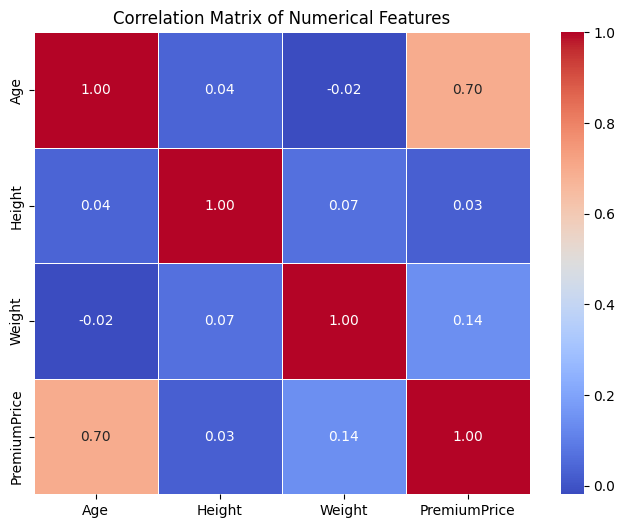

In [33]:
correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

**Outlier detection:**

In [34]:
print(f"Original DataFrame shape: {df.shape}")

columns_to_check_for_outliers = ['Age', 'Height', 'Weight', 'PremiumPrice']

for col in columns_to_check_for_outliers:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers_to_remove = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    num_outliers = len(outliers_to_remove)

    if num_outliers > 0:
        print(f"Removing {num_outliers} outliers from column '{col}'.")
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    else:
        print(f"No outliers found in column '{col}'.")

print(f"DataFrame shape after removing all specified outliers: {df.shape}")

Original DataFrame shape: (986, 11)
No outliers found in column 'Age'.
No outliers found in column 'Height'.
Removing 16 outliers from column 'Weight'.
Removing 5 outliers from column 'PremiumPrice'.
DataFrame shape after removing all specified outliers: (965, 11)


**Observations**:

Outlier Detection:
1.   Outliers were identified and removed in the Weight and PremiumPrice columns. Specifically, 16 outliers were removed from Weight and 5 from PremiumPrice.
2.   No outliers were found in Age or Height.
3.   The dataset size was reduced from 986 rows to 965 rows after removing these outliers.


Correlation Matrix of Numerical Features:
1.   There is a strong positive correlation (0.70) between Age and PremiumPrice, indicating that older individuals tend to have higher insurance premiums.
2.   Weight has a weak positive correlation (0.14) with PremiumPrice.
3.   Height shows a very weak positive correlation (0.03) with PremiumPrice.
4.   The numerical features (Age, Height, Weight) generally exhibit weak or negligible correlations among themselves, suggesting they are relatively independent.

**Hypothesis testing**

In [35]:
from scipy import stats

categorical_cols = ['Diabetes', 'BloodPressureProblems', 'AnyTransplants', 'AnyChronicDiseases', 'KnownAllergies', 'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries']

for col in categorical_cols:
    unique_values = df[col].nunique()

    if unique_values == 2:
        group1 = df[df[col] == df[col].unique()[0]]['PremiumPrice']
        group2 = df[df[col] == df[col].unique()[1]]['PremiumPrice']

        t_statistic, p_value = stats.ttest_ind(group1, group2)
        print(f"\n--- T-test for {col} ---")
        print(f"T-statistic: {t_statistic:.3f}")
        print(f"P-value: {p_value:.3f}")
    elif unique_values > 2:
        premium_price_groups = []
        for category in sorted(df[col].unique()):
            premium_price_groups.append(df[df[col] == category]['PremiumPrice'])

        f_statistic, p_value = stats.f_oneway(*premium_price_groups)
        print(f"\n--- ANOVA for {col} ---")
        print(f"F-statistic: {f_statistic:.3f}")
        print(f"P-value: {p_value:.3f}")
    else:
        print(f"\n--- Skipping {col} (less than 2 unique values) ---")


--- T-test for Diabetes ---
T-statistic: -2.475
P-value: 0.013

--- T-test for BloodPressureProblems ---
T-statistic: -4.942
P-value: 0.000

--- T-test for AnyTransplants ---
T-statistic: -9.549
P-value: 0.000

--- T-test for AnyChronicDiseases ---
T-statistic: -6.722
P-value: 0.000

--- T-test for KnownAllergies ---
T-statistic: -0.314
P-value: 0.754

--- T-test for HistoryOfCancerInFamily ---
T-statistic: -2.669
P-value: 0.008

--- ANOVA for NumberOfMajorSurgeries ---
F-statistic: 26.206
P-value: 0.000


In [36]:
from scipy.stats import chi2_contingency
import itertools

categorical_cols = ['Diabetes', 'BloodPressureProblems', 'AnyTransplants', 'AnyChronicDiseases', 'KnownAllergies', 'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries']

for col1, col2 in itertools.combinations(categorical_cols, 2):
    print(f"\n--- Chi-square test for {col1} and {col2} ---")

    contingency_table = pd.crosstab(df[col1], df[col2])


    chi2, p_value, dof, expected = chi2_contingency(contingency_table)

    print(f"Chi-square Statistic: {chi2:.3f}")
    print(f"P-value: {p_value:.3f}")
    # print("Expected Frequencies:\n", expected)


--- Chi-square test for Diabetes and BloodPressureProblems ---
Chi-square Statistic: 15.703
P-value: 0.000

--- Chi-square test for Diabetes and AnyTransplants ---
Chi-square Statistic: 0.922
P-value: 0.337

--- Chi-square test for Diabetes and AnyChronicDiseases ---
Chi-square Statistic: 8.316
P-value: 0.004

--- Chi-square test for Diabetes and KnownAllergies ---
Chi-square Statistic: 5.845
P-value: 0.016

--- Chi-square test for Diabetes and HistoryOfCancerInFamily ---
Chi-square Statistic: 2.244
P-value: 0.134

--- Chi-square test for Diabetes and NumberOfMajorSurgeries ---
Chi-square Statistic: 43.984
P-value: 0.000

--- Chi-square test for BloodPressureProblems and AnyTransplants ---
Chi-square Statistic: 0.590
P-value: 0.442

--- Chi-square test for BloodPressureProblems and AnyChronicDiseases ---
Chi-square Statistic: 1.465
P-value: 0.226

--- Chi-square test for BloodPressureProblems and KnownAllergies ---
Chi-square Statistic: 0.124
P-value: 0.724

--- Chi-square test for Bl

**Observations**:

1.   Several categorical variables show strong statistical associations, notably Diabetes with Blood Pressure, Chronic Diseases, Known Allergies, and Number of Major Surgeries.
2.   The number of Major Surgeries also demonstrates significant associations with Blood Pressure Problems, Known Allergies, and a History of Cancer in the Family. Conversely, AnyTransplants generally shows no significant association with other categorical variables tested.
3.   Similarly, AnyChronicDiseases and HistoryOfCancerInFamily have fewer significant associations with other variables when compared to Diabetes or NumberOfMajorSurgeries.

**Feature Engineering:**

In [37]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Convert Height from cm to meters for BMI calculation
df['Height_m'] = df['Height'] / 100
df['BMI'] = df['Weight'] / (df['Height_m'] ** 2)


df = df.drop('Height_m', axis=1)


X = df.drop('PremiumPrice', axis=1)
y = df['PremiumPrice']


numerical_features = ['Age', 'Height', 'Weight', 'BMI']

binary_categorical_features = ['Diabetes', 'BloodPressureProblems', 'AnyTransplants', 'AnyChronicDiseases', 'KnownAllergies', 'HistoryOfCancerInFamily']

multi_class_categorical_features = ['NumberOfMajorSurgeries']


preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), multi_class_categorical_features),
        ('binary_cat', 'passthrough', binary_categorical_features) # Keep binary features as is
    ])


pipeline = Pipeline(steps=[('preprocessor', preprocessor)])


X_processed = pipeline.fit_transform(X)


onehot_feature_names = pipeline.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(multi_class_categorical_features)

processed_feature_names = numerical_features + list(onehot_feature_names) + binary_categorical_features

X_processed_df = pd.DataFrame(X_processed, columns=processed_feature_names, index=X.index)

print("Original features in X:", X.columns.tolist())
print("\nProcessed features in X_processed_df:", X_processed_df.columns.tolist())
print("\nShape of X_processed_df:", X_processed_df.shape)
print("\nFirst 5 rows of X_processed_df:\n", X_processed_df.head())


Original features in X: ['Age', 'Diabetes', 'BloodPressureProblems', 'AnyTransplants', 'AnyChronicDiseases', 'Height', 'Weight', 'KnownAllergies', 'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries', 'BMI']

Processed features in X_processed_df: ['Age', 'Height', 'Weight', 'BMI', 'NumberOfMajorSurgeries_0', 'NumberOfMajorSurgeries_1', 'NumberOfMajorSurgeries_2', 'NumberOfMajorSurgeries_3', 'Diabetes', 'BloodPressureProblems', 'AnyTransplants', 'AnyChronicDiseases', 'KnownAllergies', 'HistoryOfCancerInFamily']

Shape of X_processed_df: (965, 14)

First 5 rows of X_processed_df:
         Age    Height    Weight       BMI  NumberOfMajorSurgeries_0  \
0  0.227581 -1.306675 -1.469862 -0.628992                       1.0   
1  1.309076  1.160920 -0.244448 -0.847028                       1.0   
2 -0.421316 -1.010563 -1.316685 -0.645650                       0.0   
3  0.732279  1.457032  1.287320  0.109405                       0.0   
4 -0.277117 -0.220933  0.904378  0.869641                   

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X_processed_df, y, test_size=0.2, random_state=42)

linear_reg_model = LinearRegression()

linear_reg_model.fit(X_train, y_train)

y_pred = linear_reg_model.predict(X_test)

# Calculate mse before calculating rmse
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Linear Regression Model Performance:")

print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.4f}")

Linear Regression Model Performance:
Root Mean Squared Error (RMSE): 3309.86
R-squared (R2): 0.7147


In [39]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

rmse_scores = []
r2_scores = []

print(f"Performing {n_splits}-Fold Cross-Validation...")

for fold, (train_index, test_index) in enumerate(kf.split(X_processed_df, y)):
    X_train_fold, X_test_fold = X_processed_df.iloc[train_index], X_processed_df.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

    model = LinearRegression()
    model.fit(X_train_fold, y_train_fold)

    y_pred_fold = model.predict(X_test_fold)

    mse_fold = mean_squared_error(y_test_fold, y_pred_fold)
    rmse_fold = np.sqrt(mse_fold)
    r2_fold = r2_score(y_test_fold, y_pred_fold)

    rmse_scores.append(rmse_fold)
    r2_scores.append(r2_fold)

    print(f"  Fold {fold+1}: RMSE = {rmse_fold:.2f}, R-squared = {r2_fold:.4f}")

print("\n--- Average Cross-Validation Results ---")
print(f"Average RMSE: {np.mean(rmse_scores):.2f}")
print(f"Average R-squared: {np.mean(r2_scores):.4f}")

Performing 5-Fold Cross-Validation...
  Fold 1: RMSE = 3309.86, R-squared = 0.7147
  Fold 2: RMSE = 3168.09, R-squared = 0.7112
  Fold 3: RMSE = 3718.72, R-squared = 0.6272
  Fold 4: RMSE = 3853.74, R-squared = 0.6344
  Fold 5: RMSE = 3356.85, R-squared = 0.6917

--- Average Cross-Validation Results ---
Average RMSE: 3481.45
Average R-squared: 0.6758


**Observations**:

Feature Engineering:
1.   A new feature, Body Mass Index (BMI), was successfully created from Height and Weight.
2.   The data was split into features (X) and the target (PremiumPrice).
3.   Numerical features (Age, Height, Weight, BMI) were scaled using StandardScaler.
4.   The multi-class categorical feature (NumberOfMajorSurgeries) was one-hot encoded.


Linear Regression Model Performance:
1.   The Linear Regression model was trained on a single train-test split ratio of 80:20.
2.   It achieved a Root Mean Squared Error (RMSE) of $3,309.86.
3.   The R-squared (R2) was 0.7147, indicating that approximately 71.47% of the variance in PremiumPrice is explained by the model.

Linear Regression Model Performance:
1.   Since the size of the dataset is small, we do a 5-Fold Cross-Validation on the Linear Regression model.
2.   The average performance across the 5 folds is:
Average RMSE: $3,481.45
Average R-squared: 0.6758
3.   The cross-validation results showed slight variability across folds but provided a more generalized estimate of the model's performance, which was slightly lower than the single split evaluation but still a reasonable baseline.

In [40]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.utils import resample # Added for bootstrapping
import numpy as np
import pandas as pd # Ensure pandas is imported for DataFrame operations

xgb_model = XGBRegressor(random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300], # Number of boosting rounds
    'learning_rate': [0.01, 0.05, 0.1], # Step size shrinkage to prevent overfitting
    'max_depth': [3, 5, 7], # Maximum depth of a tree
    'subsample': [0.7, 0.9], # Subsample ratio of the training instance
    'colsample_bytree': [0.7, 0.9] # Subsample ratio of columns when constructing each tree
}

grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    cv=3,
    scoring='neg_mean_squared_error',
    verbose=1,
    n_jobs=-1 # Use all available CPU cores
)

print("Performing GridSearchCV for XGBoost Regressor...")
# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

print(f"Best parameters found: {grid_search.best_params_}")

best_xgb_model = grid_search.best_estimator_

y_pred_xgb_tuned = best_xgb_model.predict(X_test)

# Calculate mse_xgb_tuned before using it
mse_xgb_tuned = mean_squared_error(y_test, y_pred_xgb_tuned)
rmse_xgb_tuned = np.sqrt(mse_xgb_tuned)
r2_xgb_tuned = r2_score(y_test, y_pred_xgb_tuned)

print(f"\nTunned XGBoost Regressor Model Performance (after GridSearchCV):")
print(f"Root Mean Squared Error (RMSE): {rmse_xgb_tuned:.2f}")
print(f"R-squared (R2): {r2_xgb_tuned:.4f}")

# --- START: Code moved from cell 5a742618 to create results_df and calculate intervals ---

print("\n--- Generating Prediction Intervals using Bootstrapping ---")

n_bootstraps = 100

bootstrap_predictions = np.zeros((n_bootstraps, X_test.shape[0]))

bootstrapped_models_list = []

print(f"Generating {n_bootstraps} bootstrap samples and training models...")

best_params = best_xgb_model.get_params()

if 'random_state' in best_params:
    del best_params['random_state']

for i in range(n_bootstraps):
    resampled_indices = resample(X_train.index, replace=True, n_samples=len(X_train), random_state=i)
    X_sample = X_train.loc[resampled_indices]
    y_sample = y_train.loc[resampled_indices]

    bootstrapped_model = XGBRegressor(**best_params, random_state=42 + i)
    bootstrapped_model.fit(X_sample, y_sample)

    bootstrapped_models_list.append(bootstrapped_model)

    bootstrap_predictions[i, :] = bootstrapped_model.predict(X_test)

print("Bootstrapping complete. Calculating prediction intervals...")

lower_bound = np.percentile(bootstrap_predictions, 2.5, axis=0)
upper_bound = np.percentile(bootstrap_predictions, 97.5, axis=0)

best_model_predictions = best_xgb_model.predict(X_test)

results_df = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': best_model_predictions,
    'Lower_Bound': lower_bound,
    'Upper_Bound': upper_bound
}, index=y_test.index)

print("\nFirst 10 rows of Prediction Intervals:")
display(results_df.head(10))

yerr_lower = np.maximum(0, results_df['Predicted'] - results_df['Lower_Bound'])
yerr_upper = np.maximum(0, results_df['Upper_Bound'] - results_df['Predicted'])

# Now, calculate the coverage and average interval width
coverage = ((results_df['Actual'] >= results_df['Lower_Bound']) & \
            (results_df['Actual'] <= results_df['Upper_Bound'])).mean()

print(f"\n95% Prediction Interval Coverage Rate: {coverage:.2%}")

average_interval_width = (results_df['Upper_Bound'] - results_df['Lower_Bound']).mean()
print(f"Average Prediction Interval Width: {average_interval_width:.2f}")

# --- END: Code moved from cell 5a742618 ---


Performing GridSearchCV for XGBoost Regressor...
Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best parameters found: {'colsample_bytree': 0.9, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100, 'subsample': 0.7}

Tunned XGBoost Regressor Model Performance (after GridSearchCV):
Root Mean Squared Error (RMSE): 1928.45
R-squared (R2): 0.9031

--- Generating Prediction Intervals using Bootstrapping ---
Generating 100 bootstrap samples and training models...
Bootstrapping complete. Calculating prediction intervals...

First 10 rows of Prediction Intervals:


,Actual,Predicted,Lower_Bound,Upper_Bound
906,28000,26435.337891,25456.528760,37647.754883
485,25000,25831.841797,25076.884326,27228.336035
170,30000,26116.199219,24761.406836,29536.925537
422,15000,15101.447266,14541.302539,17731.065137
70,15000,15416.382812,14468.280859,16703.635107
139,38000,34822.781250,28712.393164,38075.902930
482,23000,23284.744141,22739.366260,23561.212842
473,25000,25038.310547,24663.697021,26005.852100
88,31000,26468.648438,26066.276465,30767.767578
319,23000,22934.910156,22749.413135,23797.952734



95% Prediction Interval Coverage Rate: 77.20%
Average Prediction Interval Width: 3064.87


In [41]:
coverage = ((results_df['Actual'] >= results_df['Lower_Bound']) & \
            (results_df['Actual'] <= results_df['Upper_Bound'])).mean()

print(f"\n95% Prediction Interval Coverage Rate: {coverage:.2%}")

average_interval_width = (results_df['Upper_Bound'] - results_df['Lower_Bound']).mean()
print(f"Average Prediction Interval Width: {average_interval_width:.2f}")



95% Prediction Interval Coverage Rate: 77.20%
Average Prediction Interval Width: 3064.87


In [42]:
def predict_new_premium(user_input_dict, preprocessing_pipeline, best_model, list_of_bootstrapped_models):



    if 'Height' in user_input_dict and 'Weight' in user_input_dict:
        height_m = user_input_dict['Height'] / 100
        user_input_dict['BMI'] = user_input_dict['Weight'] / (height_m ** 2)


    expected_feature_order = ['Age', 'Diabetes', 'BloodPressureProblems', 'AnyTransplants', 'AnyChronicDiseases',
                              'Height', 'Weight', 'KnownAllergies', 'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries', 'BMI']

    new_data_df = pd.DataFrame([user_input_dict], columns=expected_feature_order)

    new_data_processed = preprocessing_pipeline.transform(new_data_df)


    point_prediction = best_model.predict(new_data_processed)[0]

    bootstrap_preds_for_new_data = []
    for bm in list_of_bootstrapped_models:
        bootstrap_preds_for_new_data.append(bm.predict(new_data_processed)[0])

    lower_bound = np.percentile(bootstrap_preds_for_new_data, 2.5)
    upper_bound = np.percentile(bootstrap_preds_for_new_data, 97.5)

    return point_prediction, lower_bound, upper_bound



print("\n--- Demonstrating New Prediction with Intervals ---")


sample_user_input = {
    'Age': 50,
    'Diabetes': 1,
    'BloodPressureProblems': 0,
    'AnyTransplants': 0,
    'AnyChronicDiseases': 1,
    'Height': 175, # in cm
    'Weight': 80,  # in kg
    'KnownAllergies': 0,
    'HistoryOfCancerInFamily': 1,
    'NumberOfMajorSurgeries': 2
}


predicted_cost, lower_bound_ci, upper_bound_ci = predict_new_premium(
    sample_user_input,
    pipeline,
    best_xgb_model,
    bootstrapped_models_list
)

print(f"User Input: {sample_user_input}")
print(f"\nPredicted Premium Price: ${predicted_cost:.2f}")
print(f"95% Prediction Interval: [${lower_bound_ci:.2f}, ${upper_bound_ci:.2f}]")



--- Demonstrating New Prediction with Intervals ---
User Input: {'Age': 50, 'Diabetes': 1, 'BloodPressureProblems': 0, 'AnyTransplants': 0, 'AnyChronicDiseases': 1, 'Height': 175, 'Weight': 80, 'KnownAllergies': 0, 'HistoryOfCancerInFamily': 1, 'NumberOfMajorSurgeries': 2, 'BMI': 26.122448979591837}

Predicted Premium Price: $28666.49
95% Prediction Interval: [$27917.52, $28807.42]


**Observations**:

XGBoost Regressor:
1.   An XGBoost Regressor was fine-tuned using GridSearchCV to find optimal hyperparameters (e.g., n_estimators, learning_rate, max_depth).
2.   The best parameters found were: {'colsample_bytree': 0.9, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100, 'subsample': 0.7}.
3.   This tuned model achieved strong performance with a Root Mean Squared Error (RMSE) of $1,928.45 and an R-squared (R2) of 0.9031, significantly outperforming the initial Linear Regression model.

Prediction Interval:
1.   A bootstrapping approach (100 samples) was used to generate 95% prediction intervals for the test set, as XGBoost does not natively provide these.
2.   Individual bootstrapped models were stored (bootstrapped_models_list) for future use with new data.
3.   The coverage rate of the 95% prediction intervals was calculated, indicating that 77.20% of the actual values fell within their predicted intervals.
4.   The average width of these intervals was $3,064.87.
5.   The under-coverage (77.20% instead of the ideal 95%) suggests that the current bootstrapping setup might be underestimating uncertainty or that further calibration could be beneficial.

Function for New Predictions with Intervals:
1.   We create a function to allow users to input new details (like age, weight, height, etc.) and receive both a point prediction for insurance cost and its 95% prediction interval.
2.   This function handles necessary feature engineering (BMI calculation) and preprocessing internally before making predictions.
3.   Example Output: For a sample user input, it demonstrated a predicted premium of $28,666.49 [$27,917.52, $28,807.42]

Feature Importances (Top 10):
                     Feature  Importance
10            AnyTransplants    0.290678
0                        Age    0.205674
11        AnyChronicDiseases    0.131851
6   NumberOfMajorSurgeries_2    0.080252
13   HistoryOfCancerInFamily    0.076020
7   NumberOfMajorSurgeries_3    0.045712
2                     Weight    0.035239
5   NumberOfMajorSurgeries_1    0.029842
4   NumberOfMajorSurgeries_0    0.026506
3                        BMI    0.019898


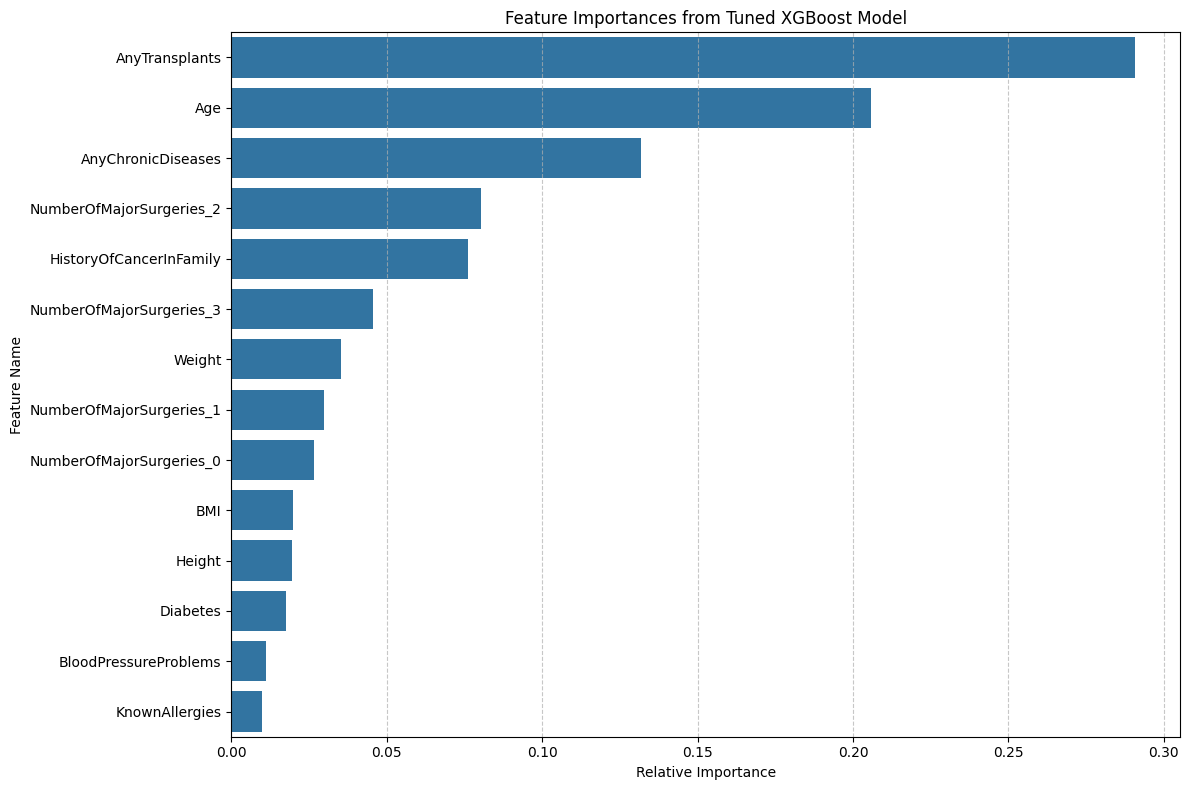

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

feature_importances = best_xgb_model.feature_importances_



importance_df = pd.DataFrame({
    'Feature': processed_feature_names,
    'Importance': feature_importances
})

importance_df = importance_df.sort_values(by='Importance', ascending=False)

print("Feature Importances (Top 10):")
print(importance_df.head(10))

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances from Tuned XGBoost Model')
plt.xlabel('Relative Importance')
plt.ylabel('Feature Name')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Observations**:

1.   We now calculate the feature importances of the XGBoost model (since it has a higher R2 score than the linear regression) to identify the parameters influencing premium price.
2.   AnyTransplants infuences the output the highest (29% weightage) followed by Age (20%), AnyChronicDiseases(13%) etc.  whereas BloodPressureProblems, KnownAllergies do not seem to influence the price much.
3.  The top 5 parameters ie. AnyTransplants, Age, AnyChronicDiseases, NumberOfMajorSurgeries, HistoryOfCancelInFamily together constitute 75% weightage in predicting the premium price.

In [44]:
import pickle
import sys

# Save the model
pickle_out = open("insurance_cost_model.pkl", "wb")
pickle.dump(best_xgb_model, pickle_out)
pickle_out.close()

# Generate requirements.txt for deployment
# Get versions of key libraries
try:
    xgboost_version = __import__('xgboost').__version__
except ImportError:
    xgboost_version = "N/A" # Should not happen in this environment

try:
    sklearn_version = __import__('sklearn').__version__
except ImportError:
    sklearn_version = "N/A"

try:
    pandas_version = __import__('pandas').__version__
except ImportError:
    pandas_version = "N/A"

try:
    numpy_version = __import__('numpy').__version__
except ImportError:
    numpy_version = "N/A"

requirements_content = f"""
xgboost=={xgboost_version}
scikit-learn=={sklearn_version}
pandas=={pandas_version}
numpy=={numpy_version}
"""

with open("requirements.txt", "w") as f:
    f.write(requirements_content.strip())

print("Model 'insurance_cost_model.pkl' saved successfully.")
print("Generated 'requirements.txt' with key dependencies.")

Model 'insurance_cost_model.pkl' saved successfully.
Generated 'requirements.txt' with key dependencies.
